# 🎓 Understanding Decision Tree for Phishing Email Classification 🌳📧

### What is a Decision Tree? 🤔
A **Decision Tree** is a **supervised learning algorithm** used for both **classification** and **regression** tasks. It works by recursively splitting the dataset based on the most important feature at each step, creating a tree-like structure. 🌳 In the case of **phishing email classification**, a Decision Tree can help determine whether an email is phishing or legitimate by analyzing various features in the email. 🚀

---

### How Decision Tree Works 🛠️

1. **Root Node and Splits**: 
   - The **root node** represents the entire dataset. The algorithm chooses the best feature to split the data into two or more groups based on **information gain**.

2. **Recursive Partitioning**:
   - The data is split recursively at each node, with each split creating branches that lead to further splits, eventually creating **leaf nodes** that represent the final classifications (e.g., phishing or safe emails). 🌳

3. **Stopping Criteria**: 
   - The splitting stops when the algorithm reaches a node where no further meaningful splits can be made, or when the data is sufficiently homogeneous (pure).

4. **Leaf Nodes and Predictions**:
   - Each **leaf node** provides a final prediction. For example, if the majority of data points in a leaf node belong to phishing emails, the prediction for that node will be phishing. 🗳️

---

### Advantages of Decision Tree for Phishing Email Classification 🌳✨

- **Simple and Interpretable**: Decision Trees are easy to understand and visualize, making it simple to interpret the decision-making process for phishing detection.
- **Requires Less Data Preprocessing**: Decision Trees can handle both **numerical** and **categorical** data without needing extensive preprocessing.

---

### Potential Limitations:
- **Overfitting**: Decision Trees can become overly complex and fit too closely to the training data, which might cause them to perform poorly on unseen data.
- **Prone to Instability**: A small change in the data can result in a completely different tree, as the splits are chosen based on the current data set.

### Implementation 🔍
1. **Loading the required libraries** 📚

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

2. **Loading and splitting the Data** 📥

In [2]:
# Load the save TF-IDF features and labels
x_data = np.load('../feature_x.npy')
y_data = np.load('../y_tf.npy')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=0)

3. **Model Initialization** 🤖

The **DecisionTreeClassifier()** is initialized with its **default parameters** in Scikit-learn.

- **`criterion="gini"`**: The default splitting criterion is the **Gini impurity**. This is used to measure the quality of the splits at each node, helping the model decide where to split the data.
  
- **`max_depth=None`**: By default, the decision tree grows until all leaves are pure (i.e., contain samples from only one class) or until it cannot split further based on the `min_samples_split` parameter. This means the tree will continue growing until it perfectly classifies the training data, which could lead to overfitting if not managed properly.

- **`min_samples_split=2`**: This defines the minimum number of samples required to split an internal node. A lower value allows for more splits, but setting it too low can lead to overfitting, as the tree might split on even small variations in the data.

- **`splitter="best"`**: The model uses the best split (based on the selected `criterion`) at each node. 

- **`random_state=None`**: The model does not use a fixed random seed by default. Specifying a `random_state` ensures reproducibility of the results.

In [3]:
decision_tree = DecisionTreeClassifier()

4. **Training the Model** 🏋️‍♂️

In [4]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

5. **Making Predictions** 🔮

In [5]:
prediction = decision_tree.predict(x_test)

6. **Evaluating the Model** 🧮

In [6]:
print(f"accuracy from Decision Tree:{accuracy_score(y_test,prediction)*100:.2f} %")
print(f"f1 score from Decision Tree: {f1_score(y_test,prediction)*100:.2f} %")
print("classification report : \n",classification_report(y_test,prediction))

accuracy from Decision Tree:92.99 %
f1 score from Decision Tree: 94.27 %
classification report : 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1351
           1       0.95      0.94      0.94      2157

    accuracy                           0.93      3508
   macro avg       0.92      0.93      0.93      3508
weighted avg       0.93      0.93      0.93      3508



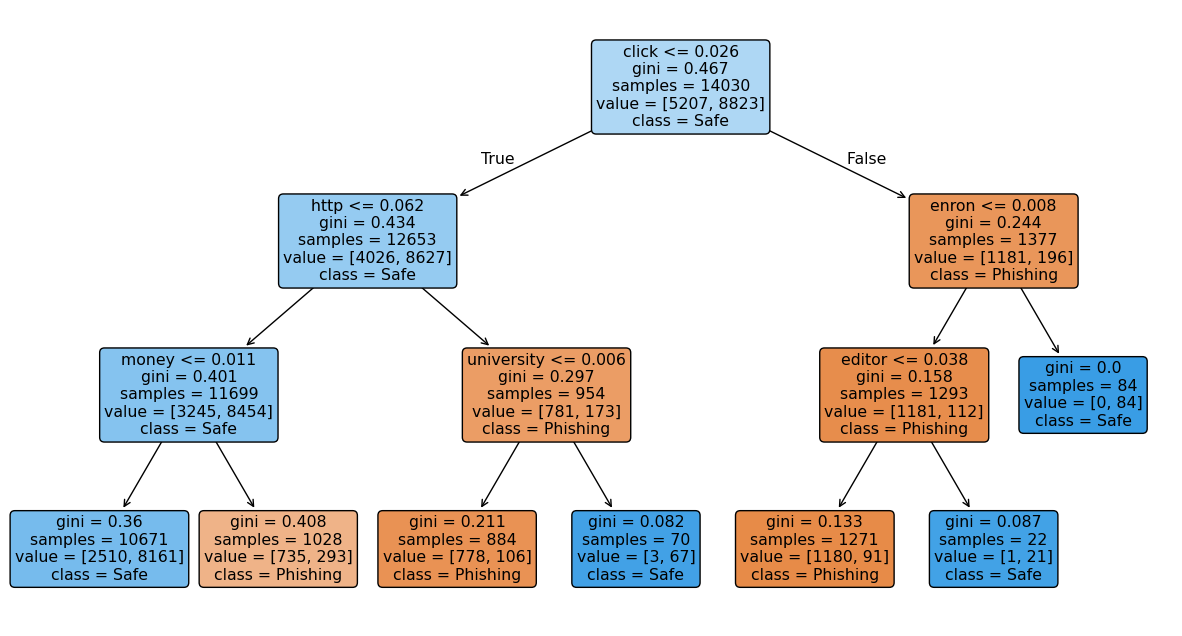

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/Cleaned_Phishing_Email.csv', na_filter=False)

tf = TfidfVectorizer(stop_words="english", max_features=10000)
tf.fit(df["Email Text"])

# Limit the depth of the tree to make it easier to interpret
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)

# Plotting the tree
plt.figure(figsize=(15,8)) 
plot_tree(decision_tree, filled=True, feature_names=tf.get_feature_names_out(), class_names=["Phishing", "Safe"], rounded=True)
plt.show()
